In [2]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d

In [4]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [18]:
beta = '08'
RC_list = ['5', '9', '20', '30', '40']
vphi_list = ['01', '02', '03']

sn = {}
prof = {}

for RC in RC_list:
    sn[RC] = {}
    prof[RC] = {}
    for vphi in vphi_list:
        outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
        sn[RC][vphi] = arepo.Snapshot(outname, 0)
        prof[RC][vphi] = gas_profile(sn[RC][vphi])

NameError: name 'gas_profile' is not defined

In [43]:
beta = '08'

RC_list = ['5', '9', '20', '30', '40']
vphi_list = ['01', '02', '03']

sfr = {}

for RC in RC_list:
    sfr[RC] = {}
    for vphi in vphi_list:
        outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
        sfr[RC][vphi] = np.genfromtxt(outname + '/sfr.txt')

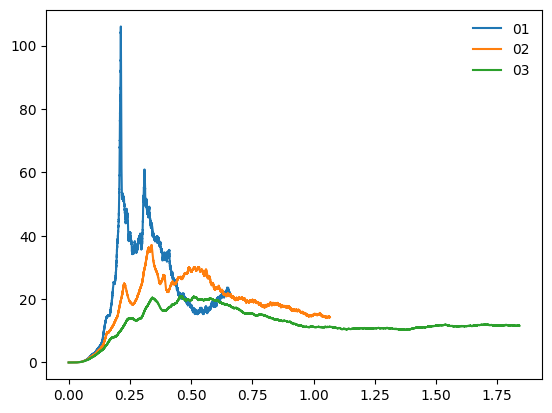

In [45]:
RC='5'

for vphi in vphi_list:
    plt.plot(sfr[RC][vphi][:,0], sfr[RC][vphi][:,2], label=vphi)

plt.legend(frameon=False)

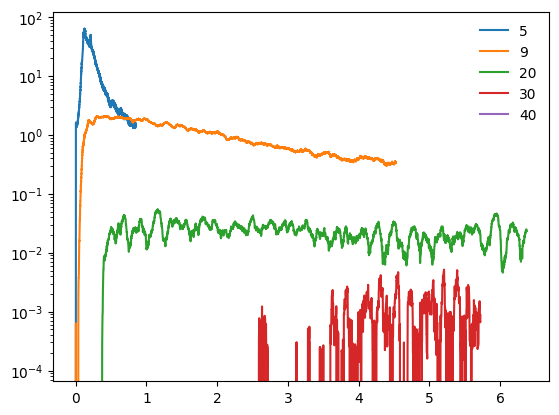

In [6]:
vphi='02'

for RC in RC_list:
    plt.plot(sfr[RC][vphi][:,0], sfr[RC][vphi][:,2], label=RC)

    plt.yscale('log')
    
plt.legend(frameon=False)

In [34]:
def weighted_median(values, weights):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    return values[i[np.searchsorted(c, 0.5 * c[-1])]]

def get_halfmass_radius(sn):
    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    
    if sn.NumPart_Total[4] == 0:
        return np.nan
    
    pos = sn.part4.pos.value - center
    mass = sn.part4.mass.value
    r = np.linalg.norm(pos, axis=1)
    
    is_star = sn.part4.GFM_StellarFormationTime > 0
    if np.sum(is_star) <= 1:
        return np.nan
    
    rhalf = weighted_median(r[is_star], mass[is_star])
    
    return rhalf

def get_stellar_mass(sn):
    if sn.NumPart_Total[4] == 0:
        return 0.0

    return np.sum(sn.part4.mass.value[sn.part4.GFM_StellarFormationTime > 0])

In [35]:
beta = '08'
RC='40'

sn_vphi = {}
time = {}
rhalf = {}
stmass = {}

idx_list = np.arange(0, 101, 2)



for vphi in vphi_list:
    sn_vphi[vphi] = {}
    rhalf[vphi] = []
    time[vphi] = []
    stmass[vphi] = []
    for idx in tqdm(idx_list):
        try:
            outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
            sn_vphi[vphi] = arepo.Snapshot(outname, idx)
        except:
            continue
        
        time[vphi].append(sn_vphi[vphi].Time.value)
        rhalf[vphi].append(get_halfmass_radius(sn_vphi[vphi]))
        stmass[vphi].append(get_stellar_mass(sn_vphi[vphi]))

100%|██████████| 51/51 [00:03<00:00, 13.75it/s]


[nan, nan, nan, nan, 4.492440837078522, 2.3667019373296387, 1.7241849561951106, 1.4826471034169564, 1.093645121252713]
[0.0, 0.2001953125, 0.400390625, 0.6005859375, 0.80078125, 1.0009765625, 1.201171875, 1.4013671875, 1.6015625]
[nan, nan, nan, nan, 7.132096026854898, 4.790255178231007, 4.716816905050874, 5.68532220494006, 4.830253191565995, 5.300913761478065, 4.06612745761793, 3.8534376620114696]
[0.0, 0.2001953125, 0.400390625, 0.6005859375, 0.80078125, 1.0009765625, 1.201171875, 1.4013671875, 1.6015625, 1.8017578125, 2.001953125, 2.2021484375]
[nan, nan, nan, nan, 9.664132123447402, 6.335946550694181, 8.537010040517574, 8.202930377444353, 8.244152959699873, 8.697020580066184, 9.194858585908648, 8.139535082259545, 8.239648090149718, 7.11843727430953]
[0.0, 0.2001953125, 0.400390625, 0.6005859375, 0.80078125, 1.0009765625, 1.201171875, 1.4013671875, 1.6015625, 1.8017578125, 2.001953125, 2.2021484375, 2.40234375, 2.6025390625]


Text(0, 0.5, 'r_half [kpc]')

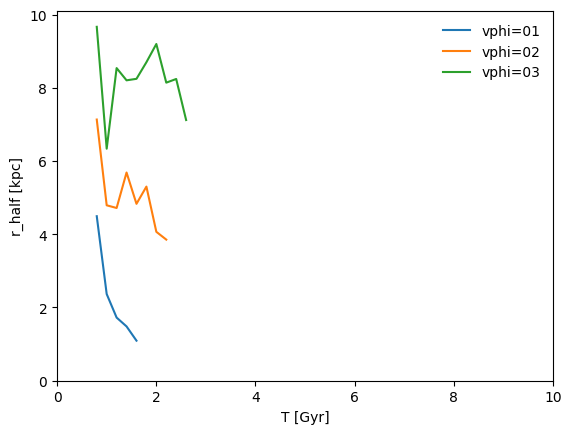

In [36]:
for vphi in vphi_list:
    print(rhalf[vphi])
    print(time[vphi])
    plt.plot(time[vphi], rhalf[vphi], label='vphi='+vphi)
    
plt.legend(frameon=False)

plt.xlim(0, 10)
plt.ylim(0, None)

plt.xlabel('T [Gyr]')
plt.ylabel('r_half [kpc]')

Text(0, 0.5, 'stellar mass [1E10 Msun]')

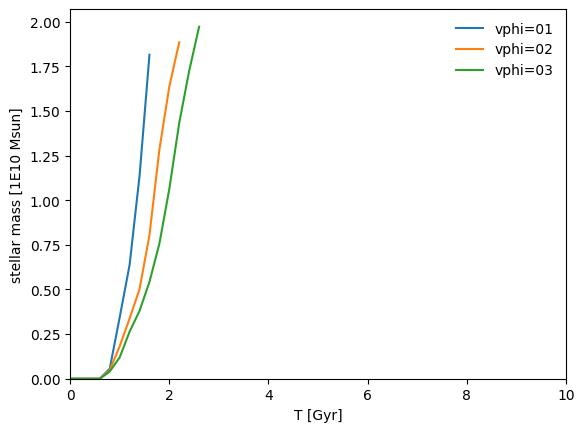

In [37]:
for vphi in vphi_list:
    plt.plot(time[vphi], stmass[vphi], label='vphi='+vphi)
    
plt.legend(frameon=False)

plt.xlim(0, 10)
plt.ylim(0, None)

plt.xlabel('T [Gyr]')
plt.ylabel('stellar mass [1E10 Msun]')

In [46]:
beta = '08'
vphi = '02'

sn_RC = {}
time = {}
rhalf = {}
stmass = {}

idx_list = np.arange(0, 101, 2)

RC_list = ['5', '9', '20', '30', '40']

for RC in RC_list:
    sn_RC[RC] = {}
    rhalf[RC] = []
    time[RC] = []
    stmass[RC] = []
    for idx in tqdm(idx_list):
        try:
            outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
            sn_RC[RC] = arepo.Snapshot(outname, idx)
        except:
            continue
        
        time[RC].append(sn_RC[RC].Time.value)
        rhalf[RC].append(get_halfmass_radius(sn_RC[RC]))
        stmass[RC].append(get_stellar_mass(sn_RC[RC]))

100%|██████████| 51/51 [00:06<00:00,  7.50it/s]


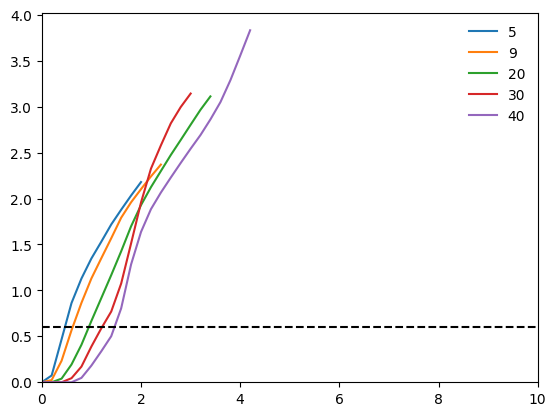

In [50]:
for RC in RC_list:
    plt.plot(time[RC], stmass[RC], label=RC)

plt.axhline(0.6, c='k', ls='dashed')
plt.xlim(0, 10)
plt.ylim(0, None)
plt.legend(frameon=False)

# new softening

In [84]:
sfr = {}
sfr['MW6iso_bt05_RC9_vphi02'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta05-RC9-vphi02-newsoft/output/sfr.txt')
sfr['MW6iso_bt06_RC9_vphi02'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta06-RC9-vphi02-newsoft/output/sfr.txt')
sfr['MW6iso_bt067_RC9_vphi02'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta067-RC9-vphi02-newsoft/output/sfr.txt')
sfr['MW6iso_bt07_RC9_vphi02'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta07-RC9-vphi02-newsoft/output/sfr.txt')
sfr['MW6iso_bt08_RC9_vphi02'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC9-vphi02-newsoft/output/sfr.txt')
sfr['MW6iso_bt09_RC9_vphi02'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta09-RC9-vphi02-newsoft/output/sfr.txt')

sfr['MW6iso_bt08_RC9_vphi02_Z2'] = np.genfromtxt(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC9-vphi02-newsoft-Z2/output/sfr.txt')
sfr['MW6iso_bt08_RC9_vphi02_fbar02'] = np.genfromtxt(basepath + 'runs/MW6iso/lvl5-beta08-fbar02-dens-newsoft/output/sfr.txt')

(0.0, 5.0)

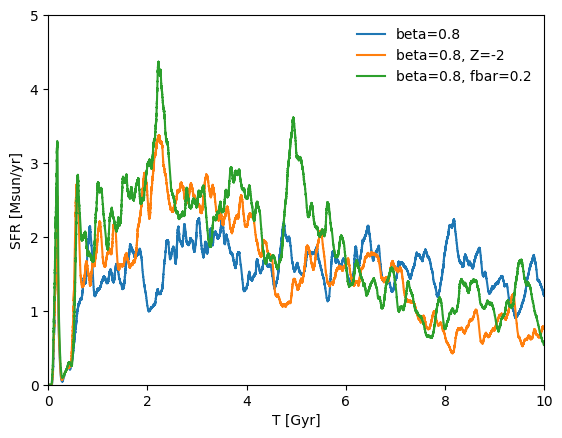

In [85]:
# plt.plot(sfr['MW6iso_bt05_RC9_vphi02'][:,0],  sfr['MW6iso_bt05_RC9_vphi02'][:,2],  label='beta=0.5')
# plt.plot(sfr['MW6iso_bt06_RC9_vphi02'][:,0],  sfr['MW6iso_bt06_RC9_vphi02'][:,2],  label='beta=0.6')
# plt.plot(sfr['MW6iso_bt067_RC9_vphi02'][:,0], sfr['MW6iso_bt067_RC9_vphi02'][:,2], label='beta=0.67')
# plt.plot(sfr['MW6iso_bt07_RC9_vphi02'][:,0],  sfr['MW6iso_bt07_RC9_vphi02'][:,2],  label='beta=0.7')
plt.plot(sfr['MW6iso_bt08_RC9_vphi02'][:,0],  sfr['MW6iso_bt08_RC9_vphi02'][:,2],  label='beta=0.8')
# plt.plot(sfr['MW6iso_bt09_RC9_vphi02'][:,0],  sfr['MW6iso_bt09_RC9_vphi02'][:,2],  label='beta=0.9')

plt.plot(sfr['MW6iso_bt08_RC9_vphi02_Z2'][:,0],  sfr['MW6iso_bt08_RC9_vphi02_Z2'][:,2],  label='beta=0.8, Z=-2')
plt.plot(sfr['MW6iso_bt08_RC9_vphi02_fbar02'][:,0],  sfr['MW6iso_bt08_RC9_vphi02_fbar02'][:,2],  label='beta=0.8, fbar=0.2')

plt.legend(frameon=False)

plt.xlim(0, 10)
plt.xlabel('T [Gyr]')
plt.ylabel('SFR [Msun/yr]')

# plt.ylim(0.1, 20)
# plt.yscale('log')

plt.ylim(0, 5)
# plt.xlim(0, 3)

# total stellar mass

In [41]:
def get_stmass(sn):
    if sn.NumPart_Total[4] == 0:
        return 0.0
    
    is_star = sn.part4.GFM_StellarFormationTime > 0
    if np.sum(is_star) == 0:
        return 0.0

    return np.sum(sn.part4.mass.value[is_star])

In [58]:
sn120 = {}
for bt in ['05', '06', '067', '07', '08', '09']:
    try:
        sn120[bt] = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta'+bt+'-RC9-vphi02-newsoft/output', 120)
        # print('loaded for bt=', bt)
    except:
        pass

for bt in sn120.keys():
    print(bt, get_stmass(sn120[bt]))

05 0.099542096
06 0.15706256
067 0.24864575
07 0.26676127
08 0.27435222
09 0.27795142


In [60]:
sn120 = {}
for vp in ['01', '02', '03']:
    try:
        sn120[vp] = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC5-vphi'+vp+'-newsoft/output', 120)
        # print('loaded for bt=', bt)
    except:
        pass

for vp in sn120.keys():
    print(vp, get_stmass(sn120[vp]))

01 0.23276456
02 0.25786075
03 0.237683


In [87]:
sn10 = arepo.Snapshot(basepath+'runs/MW6iso-grid/lvl5-beta08-RC9-vphi02-newsoft/output', 120)
print('Z=-10', get_stmass(sn10))

sn2 = arepo.Snapshot(basepath+'runs/MW6iso-grid/lvl5-beta08-RC9-vphi02-newsoft-Z2/output', 120)
print('Z=-2', get_stmass(sn2))

snfb02 = arepo.Snapshot(basepath+'runs/MW6iso/lvl5-beta08-fbar02-dens-newsoft/output', 120)
print('fb=0.2', get_stmass(snfb02))

Z=-10 0.27435222
Z=-2 0.38784063
fb=0.2 0.44349647


# density profiles

In [12]:
sn0 = {}
sn0['05'] = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta05-RC9-vphi02-newsoft/output', 0)
sn0['06'] = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta06-RC9-vphi02-newsoft/output', 0)
sn0['067'] = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta067-RC9-vphi02-newsoft/output', 0)
sn0['07'] = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta07-RC9-vphi02-newsoft/output', 0)
sn0['08'] = arepo.Snapshot(basepath + 'runs/MW6iso-grid/lvl5-beta08-RC9-vphi02-newsoft/output', 0)

In [80]:
def gas_profile(sn, rmax=300, Nbin=1024, dN=64, center=None):
    center = sn.part1.pos.value[np.argmin(sn.part1.pot.value)]

    pos = sn.part0.CenterOfMass - center
    r = np.linalg.norm(pos, axis=1)
    N = len(r)
    
    out = {}
    out['rlist'] = []
    out['rholist'] = []
    out['err_rholist'] = []
    
    imin = 0
    
    keysort = np.argsort(r)
    r = r[keysort]
    rho = sn.part0.rho.value[keysort]
    
    while imin < N:
        averho = np.mean(rho[imin:imin+Nbin])
        aver = np.mean(r[imin:imin+Nbin])

        # rho_err = np.std(rho[imin:imin+Nbin])
        
        out['rlist'].append(aver)
        out['rholist'].append(averho)
        # out['err_rholist'].append(rho_err)
        
        imin += dN
    
    for k in out.keys():
        out[k] = np.array(out[k])
    
    # now make plotting rlist
    out['rlist_plot'] = np.logspace(-1, 3, 10000)
    out['rho_interp'] = interp1d(out['rlist'], out['rholist'], bounds_error=False, fill_value='extrapolate')
    out['rholist_plot'] = out['rho_interp'](out['rlist_plot'])
    
    return out

def get_baryon_frac(sn, rcut=10):
    center = np.array([sn.BoxSize/2.]*3)
    r0 = np.linalg.norm(sn.part0.pos.value - center, axis=1)
    r1 = np.linalg.norm(sn.part1.pos.value - center, axis=1)
    
    M0 = np.sum(sn.part0.mass.value[r0 < rcut])
    M1 = sn.MassTable[1].value * np.sum(r1 < rcut)
    
    return M0/(M0+M1)

In [81]:
prof0 = {}
for k in sn0.keys():
    prof0[k] = gas_profile(sn0[k])
    print(k, get_baryon_frac(sn0[k]))

05 0.023965172684883095
06 0.03963916254445378
067 0.055308689205806075
07 0.06396506141662645
08 0.09855603009379817


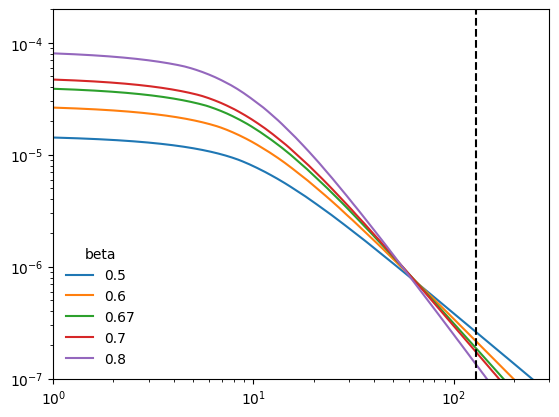

In [33]:
fig, ax = plt.subplots(1, 1)

ax.plot(prof0['05']['rlist_plot'], prof0['05']['rholist_plot'], label='0.5')
ax.plot(prof0['06']['rlist_plot'], prof0['06']['rholist_plot'], label='0.6')
ax.plot(prof0['067']['rlist_plot'], prof0['067']['rholist_plot'], label='0.67')
ax.plot(prof0['07']['rlist_plot'], prof0['07']['rholist_plot'], label='0.7')
ax.plot(prof0['08']['rlist_plot'], prof0['08']['rholist_plot'], label='0.8')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(1, 300), ylim=(1e-7, 2e-4))

ax.axvline(129, c='k', ls='dashed')

ax.legend(frameon=False, title='beta')